In [41]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

<IPython.core.display.Javascript object>


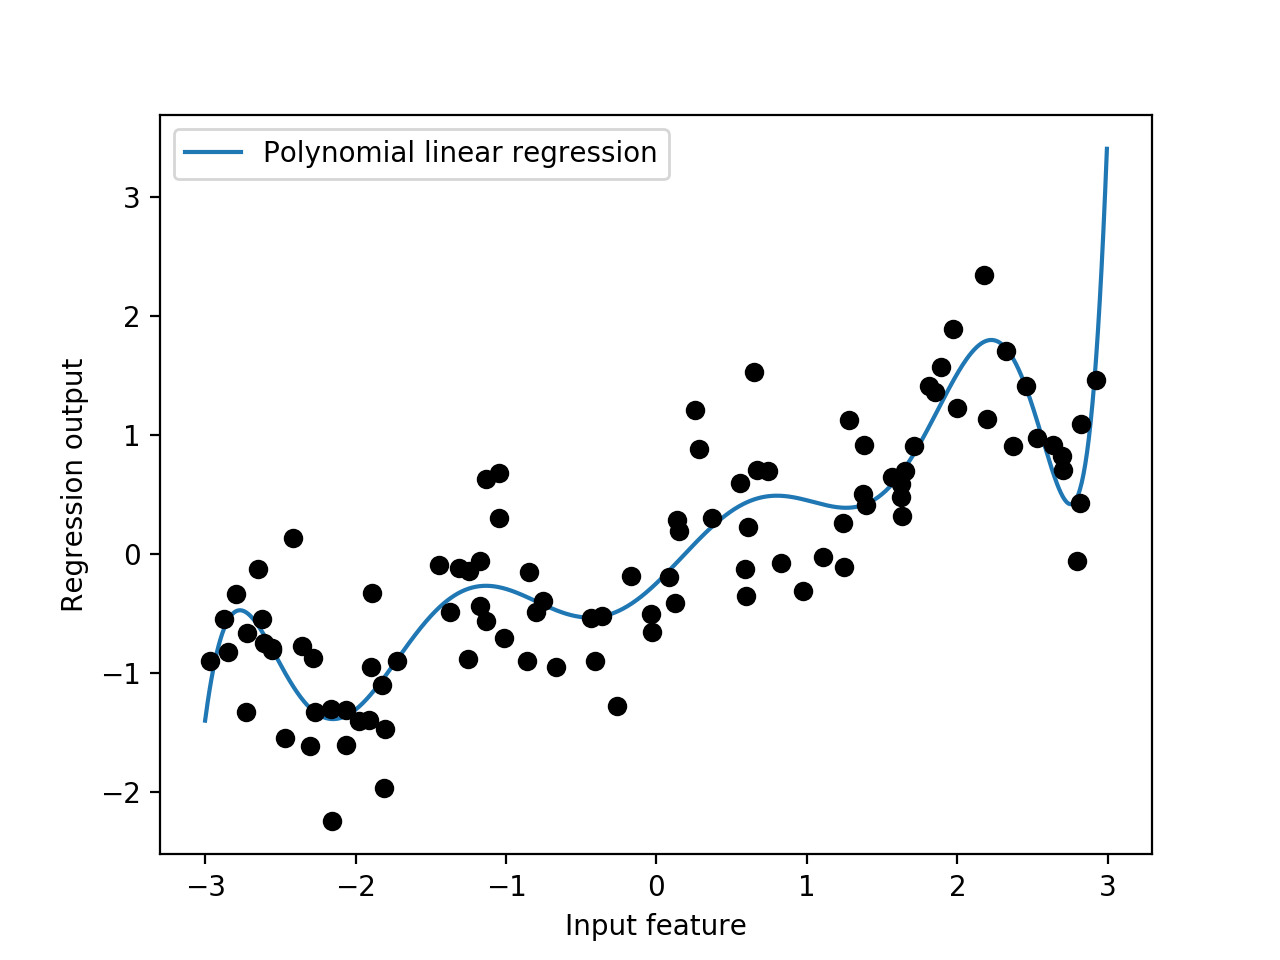

In [45]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
fig, ax = plt.subplots()
ax.plot(line, reg.predict(line_poly), label="Polynomial linear regression")
ax.plot(X[:, 0], y, 'o', c='k')
ax.set_xlabel("Input feature")
ax.set_ylabel("Regression output")
ax.legend()

In [46]:
from sklearn.svm import SVR

<IPython.core.display.Javascript object>


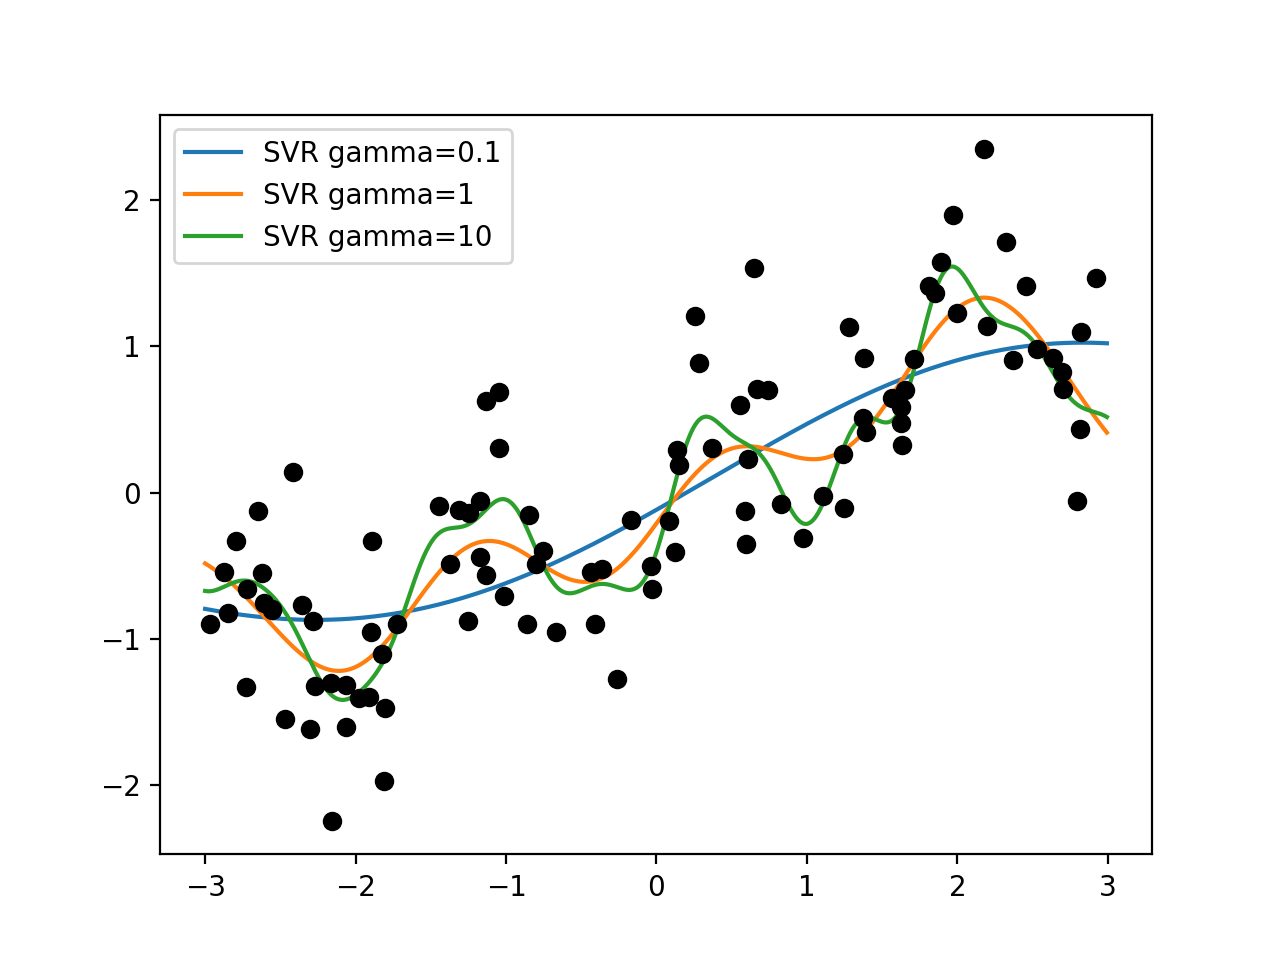

In [47]:
fig, ax = plt.subplots()
for gamma in [0.1, 1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    ax.plot(line, svr.predict(line), label=f"SVR gamma={gamma}")
ax.legend()
ax.plot(X[:, 0], y, 'o', c="k")

In [48]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [50]:
X_test_scaled = scaler.transform(X_test)

In [51]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
X_train.shape, X_train_poly.shape

((379, 13), (379, 105))

In [52]:
from sklearn.linear_model import Ridge

In [53]:
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interaction %s" % ridge.score(X_test_scaled, y_test))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interaction %s" % ridge.score(X_test_poly, y_test))


Score without interaction 0.621458322792
Score with interaction 0.753478202098


In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))


Score without interactions: 0.795
Score with interactions: 0.770
